<a href="https://colab.research.google.com/github/yaqubmir/Breathing/blob/main/June30_Hypercapnia_all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
filepath = '/content/june30_2023_440_hypercapnia.csv'
import numpy as np

In [53]:
data = pd.read_csv(filepath)
filename = filepath.split('/')[-1].split('.')[0]
filename

'june30_2023_440_hypercapnia'

In [54]:
data.columns

Index(['Unnamed: 0', 'Date', 'time', 'time1', 'Frequency', 'behaviour'], dtype='object')

In [55]:


data = data[['Date', 'time', 'time1', 'Frequency']]

In [56]:
def map_behaviour(frequency):
  if frequency>=500:
    return 'Snifing'
  elif frequency>=400 and frequency<500:
    return 'licking'
  elif frequency>=300 and frequency<400:
    return 'face scratching'
  elif frequency>=50:
    return 'calm'
  else:
    return 'rej'

In [57]:
data['behaviour'] = data['Frequency'].map(map_behaviour)

In [58]:
new_data = data[599:4199]
new_data

,Date,time,time1,Frequency,behaviour
599,30-Jun-23,4:43:17 PM.563,10:06.0,374,face scratching
600,30-Jun-23,4:43:18 PM.563,10:07.0,366,face scratching
601,30-Jun-23,4:43:19 PM.563,10:08.0,417,licking
602,30-Jun-23,4:43:20 PM.563,10:09.0,349,face scratching
603,30-Jun-23,4:43:21 PM.563,10:10.0,414,licking
...,...,...,...,...,...
4194,30-Jun-23,5:43:12 PM.563,10:01.0,416,licking
4195,30-Jun-23,5:43:13 PM.563,10:02.0,486,licking
4196,30-Jun-23,5:43:14 PM.563,10:03.0,512,Snifing
4197,30-Jun-23,5:43:15 PM.563,10:04.0,413,licking


In [59]:

data.to_csv(filename + '.csv')

In [60]:
freq = []
for i in range(0, 60):
  if i >=20 and i<40:
    temp = new_data[i*60:i*60+60]
    value = temp['Frequency'].mean()
    freq.append(value)
  else:
    temp = new_data[i*60:i*60+60]

    temp = temp[temp['behaviour'] == 'calm']

    value = temp['Frequency'].mean()
    if temp.shape[0] == 0:
      freq.append(130)
    else:
      freq.append(value)


In [61]:
data = {'frequency': freq}
data= pd.DataFrame(data)
data.to_csv(filename + '_minute.csv')

In [62]:
from matplotlib import pyplot as plt
len(freq)

60

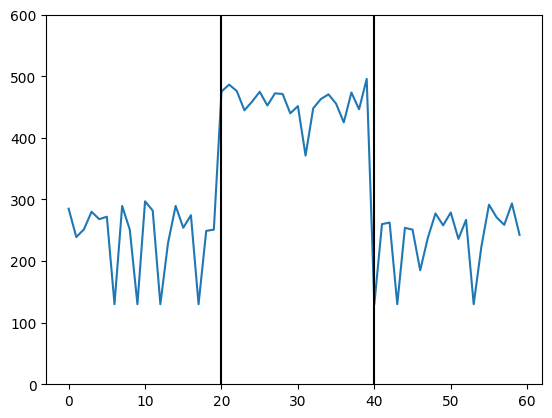

In [63]:
plt.plot([x for x in range(60)], freq)
x1= [20 for i in range(600)]
x2= [40 for i in range(600)]
y1 = [i for i in range(600)]

plt.plot(20)
plt.plot(x1, y1, color='black')
plt.plot(x2, y1, color='black')
plt.ylim(0,600)

plt.savefig(filename+'.png', dpi=600)

In [69]:
%cd

/root
